In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pdb

from IPython.display import clear_output
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

## NASA STCA

In [3]:
if True:
    data_cl = pd.read_excel('../cases/stca/aircraft/NASA all flap data.xlsx', sheet_name='CL')
    data_cd = pd.read_excel('../cases/stca/aircraft/NASA all flap data.xlsx', sheet_name='CD')

    alpha = data_cl.values[2:,0]
    theta_slats = np.unique(data_cl.values[0, 1:])
    theta_flaps = np.unique(data_cl.values[1, 1:])

    CL = np.zeros((np.size(alpha), np.size(theta_flaps), np.size(theta_slats)))
    CD = np.zeros((np.size(alpha), np.size(theta_flaps), np.size(theta_slats)))

    for i in np.arange(np.size(alpha)):
        for j in np.arange(np.size(theta_slats)):
            CL[i, :, j] = np.flip(data_cl.values[2+i, 1+j*np.size(theta_flaps):1+(j+1)*np.size(theta_flaps)])
            CD[i, :, j] = np.flip(data_cd.values[2+i, 1+j*np.size(theta_flaps):1+(j+1)*np.size(theta_flaps)])

    # if False: 
    #     np.save('../pyNA/cases/stca/aircraft/cl_stca.npy', CL)
    #     np.save('../pyNA/cases/stca/aircraft/cd_stca.npy', CD)

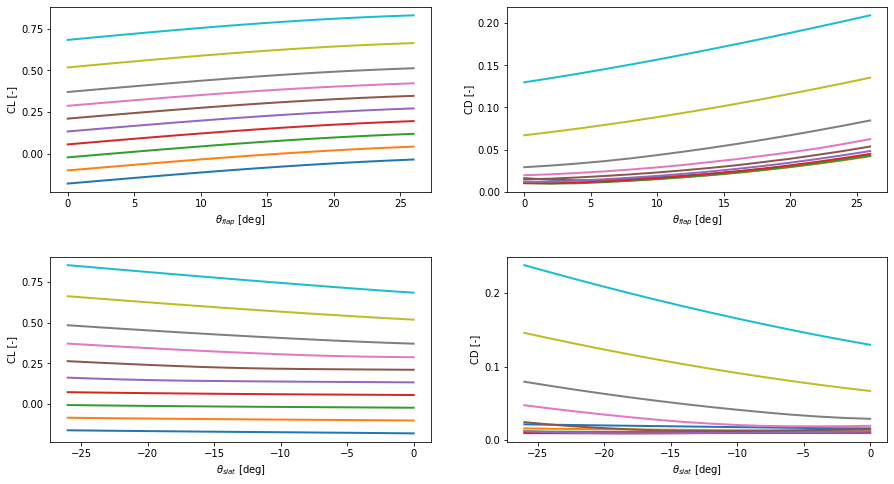

In [5]:
# Plot results 
if True:
    fig, ax = plt.subplots(2,2,figsize=(15,8))
    plt.style.use(['plot.mplstyle'])
    for i,_ in enumerate(theta_flaps):
        ax[0,0].plot(alpha, CL[:, i, -1])
        ax[0,1].plot(theta_flaps, CD[i, :, -1])
    ax[0,0].set_xlabel(r'$\theta_{flap}$ [deg]')
    ax[0,0].set_ylabel('CL [-]')


    ax[0,1].set_xlabel(r'$\theta_{flap}$ [deg]')
    ax[0,1].set_ylabel('CD [-]')


    for i,_ in enumerate(alpha):
        ax[1,0].plot(theta_slats, CL[i, 0, :])
    ax[1,0].set_xlabel(r'$\theta_{slat}$ [deg]')
    ax[1,0].set_ylabel('CL [-]')
    for i,_ in enumerate(alpha):
        ax[1,1].plot(theta_slats, CD[i, 0, :])
    ax[1,1].set_xlabel(r'$\theta_{slat}$ [deg]')
    ax[1,1].set_ylabel('CD [-]')

    plt.subplots_adjust(hspace=0.35)

## Data A10

In [21]:
data = dict()
data['CL'] = pd.read_excel('../cases/a10/aircraft/aerodeck_a10.xlsx', sheet_name="CL")
data['CD'] = pd.read_excel('../cases/a10/aircraft/aerodeck_a10.xlsx', sheet_name="CD")

In [22]:
alpha = data['CL'].values[1:,0]
theta_flaps = data['CL'].values[0,1:]
theta_slats = theta_flaps

CL = np.zeros((np.size(alpha), np.size(theta_flaps), np.size(theta_slats)))
CD = np.zeros((np.size(alpha), np.size(theta_flaps), np.size(theta_slats)))

for i in np.arange(np.size(alpha)):
    for j in np.arange(np.size(theta_slats)):
        CL[i, :, j] = data['CL'].values[i+1,1:]
        CD[i, :, j] = data['CD'].values[i+1,1:]
    
if True: 
    np.save('../cases/a10/aircraft/c_l_a10.npy', CL)
    np.save('../cases/a10/aircraft/c_d_a10.npy', CD)

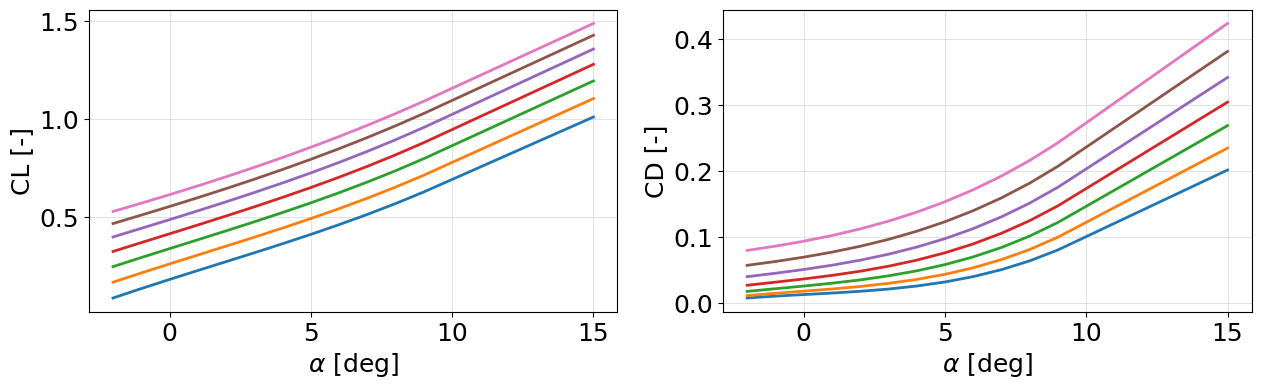

In [24]:
# Plot results 
if True:
    fig, ax = plt.subplots(1,2,figsize=(15,4))
    plt.style.use(['plot.mplstyle'])
    
    for i,_ in enumerate(theta_flaps):
        ax[0].plot(alpha, CL[:, i, -1])
    ax[0].set_xlabel(r'$\alpha$ [deg]')
    ax[0].set_ylabel('CL [-]')

    for i,_ in enumerate(theta_flaps):
        ax[1].plot(alpha, CD[:, i, -1])
    ax[1].set_xlabel(r'$\alpha$ [deg]')
    ax[1].set_ylabel('CD [-]')

    plt.subplots_adjust(hspace=0.35)

In [25]:
c_l_max = np.zeros(np.shape(CL))

for i in np.arange(np.size(alpha)):
    for j in np.arange(np.size(theta_flaps)):
        
        c_l_max[i,j,:] = np.max(CL[:,j,:])

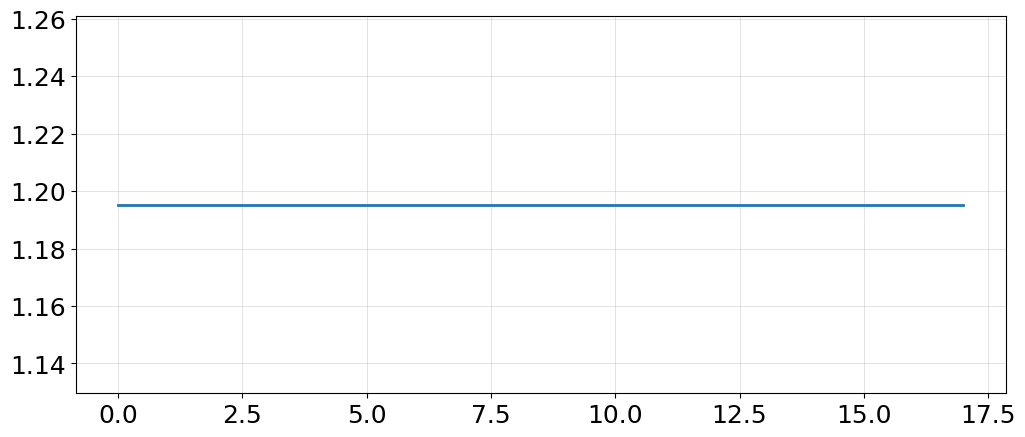

In [26]:
plt.plot(c_l_max[:,2,0])

In [27]:
np.save('../cases/a10/aircraft/c_l_max_a10.npy', c_l_max)